In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import sem
import csv
import numpy as np

In [2]:
ct_df = pd.read_csv("raw_data/clinicaltrial_data.csv")
md_df = pd.read_csv("raw_data/mouse_drug_data.csv")

merged_df = pd.merge(ct_df, md_df, on="Mouse ID")
merged_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [3]:
#merged_df['Drug'].unique()

#group_drug_df.drop(['Ceftamin','Naftisol','Propriva','Ramicane','Stelasyn','Zoniferol'])
#keep: Capomulin, Infubinol, Ketapril, and Placebo
merged_df.loc[(merged_df['Drug'] != 'Ceftamin') & \
              (merged_df['Drug'] !='Naftisol') & \
              (merged_df['Drug'] !='Naftisol') & \
              (merged_df['Drug'] != 'Propriva') & \
              (merged_df['Drug'] !='Ramicane') & \
              (merged_df['Drug'] !='Stelasyn') & \
              (merged_df['Drug'] !='Zoniferol') ,:]

group_drug_df = merged_df.groupby(['Drug','Timepoint'])
TumorVolumeMean_df = group_drug_df.mean()['Tumor Volume (mm3)']
TumorVolumeMean_df.head()

TVM_indexreset_df = TumorVolumeMean_df.reset_index()
TVM_indexreset_df.head()

CapomulinMeanVolume = TVM_indexreset_df.loc[TVM_indexreset_df['Drug'] == 'Capomulin']
InfubinolMeanVolume = TVM_indexreset_df.loc[TVM_indexreset_df['Drug'] == 'Infubinol']
KetaprilMeanVolume = TVM_indexreset_df.loc[TVM_indexreset_df['Drug'] == 'Ketapril']
PlaceboMeanVolume = TVM_indexreset_df.loc[TVM_indexreset_df['Drug'] == 'Placebo']

In [4]:
fig, ax = plt.subplots()

plt.scatter(CapomulinMeanVolume['Timepoint'],CapomulinMeanVolume['Tumor Volume (mm3)'], label = 'Capomulin', marker="o", facecolors="red", edgecolors="black",alpha=0.75)
plt.scatter(InfubinolMeanVolume['Timepoint'],InfubinolMeanVolume['Tumor Volume (mm3)'], label = 'Infubinol',marker="^", facecolors="blue", edgecolors="black",alpha=0.75)
plt.scatter(KetaprilMeanVolume['Timepoint'],KetaprilMeanVolume['Tumor Volume (mm3)'], label = 'Ketapril',marker="s", facecolors="green", edgecolors="black",alpha=0.75)
plt.scatter(PlaceboMeanVolume['Timepoint'],PlaceboMeanVolume['Tumor Volume (mm3)'], label = 'Placebo',marker="D", facecolors="black", edgecolors="black",alpha=0.75)

plt.xlim(0, max(PlaceboMeanVolume['Timepoint']+1))
plt.title('Tumor Response To Treatment')
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.legend(loc="best")
plt.grid(lineStyle = 'dotted')

plt.plot(CapomulinMeanVolume['Timepoint'],CapomulinMeanVolume['Tumor Volume (mm3)'], linestyle='--',linewidth=0.7, color="red")
plt.plot(InfubinolMeanVolume['Timepoint'],InfubinolMeanVolume['Tumor Volume (mm3)'], linestyle='--',linewidth=0.7,color="blue")
plt.plot(KetaprilMeanVolume['Timepoint'],KetaprilMeanVolume['Tumor Volume (mm3)'], linestyle='--',linewidth=0.7,color="green")
plt.plot(PlaceboMeanVolume['Timepoint'],PlaceboMeanVolume['Tumor Volume (mm3)'], linestyle='--',linewidth=0.7,color="black")

plt.errorbar(CapomulinMeanVolume['Timepoint'], CapomulinMeanVolume['Tumor Volume (mm3)'], yerr = sem(CapomulinMeanVolume['Tumor Volume (mm3)']),linestyle ="--",fmt = 'o',capsize=3,capthick=1,markeredgecolor='red')
plt.errorbar(InfubinolMeanVolume['Timepoint'],InfubinolMeanVolume['Tumor Volume (mm3)'], yerr = sem(InfubinolMeanVolume['Tumor Volume (mm3)']),linestyle ="--",fmt = 'o',capsize=3,capthick=1,markeredgecolor='blue')
plt.errorbar(KetaprilMeanVolume['Timepoint'],KetaprilMeanVolume['Tumor Volume (mm3)'],  yerr = sem(KetaprilMeanVolume['Tumor Volume (mm3)']),linestyle ="--",fmt = 'o',capsize=3,capthick=1,markeredgecolor='green')
plt.errorbar(PlaceboMeanVolume['Timepoint'],PlaceboMeanVolume['Tumor Volume (mm3)'],  yerr = sem(PlaceboMeanVolume['Tumor Volume (mm3)']),linestyle ="--",fmt = 'o',capsize=3,capthick=1,markeredgecolor='black')

<Container object of 3 artists>

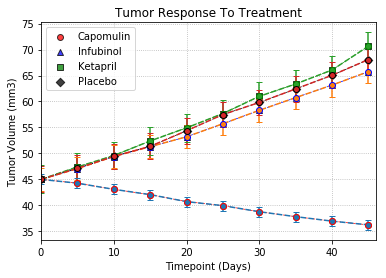

In [5]:
plt.show()
#missing: error bars per plot point

In [6]:
fig, ax = plt.subplots()
metaStaticMean_df = group_drug_df.mean()['Metastatic Sites']
MSS_indexreset_df = metaStaticMean_df.reset_index()
MSS_indexreset_df.head()

CapomulinMeanVolumeMSS = MSS_indexreset_df.loc[MSS_indexreset_df['Drug'] == 'Capomulin']
InfubinolMeanVolumeMSS = MSS_indexreset_df.loc[MSS_indexreset_df['Drug'] == 'Infubinol']
KetaprilMeanVolumeMSS = MSS_indexreset_df.loc[MSS_indexreset_df['Drug'] == 'Ketapril']
PlaceboMeanVolumeMSS = MSS_indexreset_df.loc[MSS_indexreset_df['Drug'] == 'Placebo']

plt.scatter(CapomulinMeanVolumeMSS['Timepoint'],CapomulinMeanVolumeMSS['Metastatic Sites'], label = 'Capomulin', marker="o", facecolors="red", edgecolors="black",alpha=0.75)
plt.scatter(InfubinolMeanVolumeMSS['Timepoint'],InfubinolMeanVolumeMSS['Metastatic Sites'], label = 'Infubinol',marker="^", facecolors="blue", edgecolors="black",alpha=0.75)
plt.scatter(KetaprilMeanVolumeMSS['Timepoint'],KetaprilMeanVolumeMSS['Metastatic Sites'], label = 'Ketapril',marker="s", facecolors="green", edgecolors="black",alpha=0.75)
plt.scatter(PlaceboMeanVolumeMSS['Timepoint'],PlaceboMeanVolumeMSS['Metastatic Sites'], label = 'Placebo',marker="D", facecolors="black", edgecolors="black",alpha=0.75)

plt.xlim(0, max(PlaceboMeanVolumeMSS['Timepoint']+1))
plt.title('Metastatic Spread During Treatment')
plt.xlabel("Timepoint/Treatment Duration (Days)")
plt.ylabel("Metastatic Sites")
plt.legend(loc="best")
plt.grid(lineStyle = 'dotted')

plt.plot(CapomulinMeanVolumeMSS['Timepoint'],CapomulinMeanVolumeMSS['Metastatic Sites'], linestyle='--',linewidth=0.7, color="red")
plt.plot(InfubinolMeanVolumeMSS['Timepoint'],InfubinolMeanVolumeMSS['Metastatic Sites'], linestyle='--',linewidth=0.7,color="blue")
plt.plot(KetaprilMeanVolumeMSS['Timepoint'],KetaprilMeanVolumeMSS['Metastatic Sites'], linestyle='--',linewidth=0.7,color="green")
plt.plot(PlaceboMeanVolumeMSS['Timepoint'],PlaceboMeanVolumeMSS['Metastatic Sites'], linestyle='--',linewidth=0.7,color="black")

plt.errorbar(CapomulinMeanVolumeMSS['Timepoint'], CapomulinMeanVolumeMSS['Metastatic Sites'], yerr = sem(CapomulinMeanVolumeMSS['Metastatic Sites']),linestyle ="--",fmt = 'o',capsize=3,capthick=1,markeredgecolor='red')
plt.errorbar(InfubinolMeanVolumeMSS['Timepoint'],InfubinolMeanVolumeMSS['Metastatic Sites'], yerr = sem(InfubinolMeanVolumeMSS['Metastatic Sites']),linestyle ="--",fmt = 'o',capsize=3,capthick=1,markeredgecolor='blue')
plt.errorbar(KetaprilMeanVolumeMSS['Timepoint'],KetaprilMeanVolumeMSS['Metastatic Sites'],  yerr = sem(KetaprilMeanVolumeMSS['Metastatic Sites']),linestyle ="--",fmt = 'o',capsize=3,capthick=1,markeredgecolor='green')
plt.errorbar(PlaceboMeanVolumeMSS['Timepoint'],PlaceboMeanVolumeMSS['Metastatic Sites'],  yerr = sem(PlaceboMeanVolumeMSS['Metastatic Sites']),linestyle ="--",fmt = 'o',capsize=3,capthick=1,markeredgecolor='black')


<Container object of 3 artists>

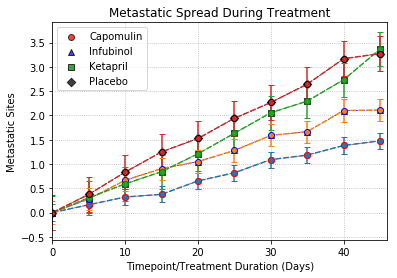

In [7]:
plt.show()


In [8]:
fig, ax = plt.subplots()

#def testfunc(num1):
   # num1 = float(num1)
    #percentage = num1/26
#return percentage

SR_df = merged_df.groupby(['Drug', 'Timepoint']).count()['Mouse ID']
SR_indexreset_df = SR_df.reset_index()
SR_indexreset_df.head()

CapomulinMeanVolumeSR = SR_indexreset_df.loc[SR_indexreset_df['Drug'] == 'Capomulin']
InfubinolMeanVolumeSR = SR_indexreset_df.loc[SR_indexreset_df['Drug'] == 'Infubinol']
KetaprilMeanVolumeSR = SR_indexreset_df.loc[SR_indexreset_df['Drug'] == 'Ketapril']
PlaceboMeanVolumeSR = SR_indexreset_df.loc[SR_indexreset_df['Drug'] == 'Placebo']

SR_indexreset_df= pd.pivot_table(SR_indexreset_df, index='Timepoint', columns='Drug', values='Mouse ID')#, aggfunc = testfunc)
SR_indexreset_df= SR_indexreset_df

plt.scatter(CapomulinMeanVolumeSR['Timepoint'],CapomulinMeanVolumeSR['Mouse ID'], label = 'Capomulin', marker="o", facecolors="red", edgecolors="black",alpha=0.75)
plt.scatter(InfubinolMeanVolumeSR['Timepoint'],InfubinolMeanVolumeSR['Mouse ID'], label = 'Infubinol',marker="^", facecolors="blue", edgecolors="black",alpha=0.75)
plt.scatter(KetaprilMeanVolumeSR['Timepoint'],KetaprilMeanVolumeSR['Mouse ID'], label = 'Ketapril',marker="s", facecolors="green", edgecolors="black",alpha=0.75)
plt.scatter(PlaceboMeanVolumeSR['Timepoint'],PlaceboMeanVolumeSR['Mouse ID'], label = 'Placebo',marker="D", facecolors="black", edgecolors="black",alpha=0.75)

plt.xlim(0, max(PlaceboMeanVolumeSR['Timepoint']+1))      
plt.title('Survival Rate During Treatment')
plt.xlabel('Timepoint/Treatment Duration (Days)')
plt.ylabel("Survival Rate")
plt.legend(loc="best")
plt.grid(lineStyle = 'dotted')

plt.plot(CapomulinMeanVolumeSR['Timepoint'],CapomulinMeanVolumeSR['Mouse ID'], linestyle='--',linewidth=0.7, color="red")
plt.plot(InfubinolMeanVolumeSR['Timepoint'],InfubinolMeanVolumeSR['Mouse ID'], linestyle='--',linewidth=0.7,color="blue")
plt.plot(KetaprilMeanVolumeSR['Timepoint'],KetaprilMeanVolumeSR['Mouse ID'], linestyle='--',linewidth=0.7,color="green")
plt.plot(PlaceboMeanVolumeSR['Timepoint'],PlaceboMeanVolumeSR['Mouse ID'], linestyle='--',linewidth=0.7,color="black")

vals = ax.get_yticks()
ax.set_yticklabels(['{:3.2f}%'.format(x*4) for x in vals])

[Text(0,0,'30.00%'),
 Text(0,0,'40.00%'),
 Text(0,0,'50.00%'),
 Text(0,0,'60.00%'),
 Text(0,0,'70.00%'),
 Text(0,0,'80.00%'),
 Text(0,0,'90.00%'),
 Text(0,0,'100.00%'),
 Text(0,0,'110.00%')]

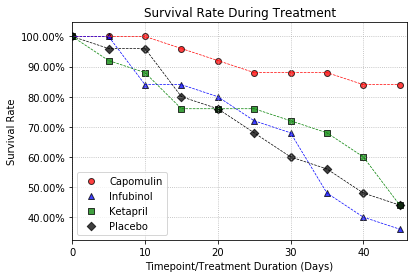

In [9]:
plt.show()

In [10]:
#Debugging
#https://pandas.pydata.org/pandas-docs/stable/reshaping.html
#https://pandas.pydata.org/pandas-docs/stable/generated/pandas.pivot_table.html
def testfunc(num1):
    num1 = float(num1)
    percentage = num1/26
    return percentage

SR_df = merged_df.groupby(['Drug', 'Timepoint']).count()['Mouse ID']
SR_indexreset_df = SR_df.reset_index()

SR_indexreset_df= pd.pivot_table(SR_indexreset_df, index='Timepoint', columns='Drug', values='Mouse ID', aggfunc = testfunc)

SR_indexreset_df= SR_indexreset_df
SR_indexreset_df.head(45)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.961538,0.961538,0.961538,0.961538,0.961538,0.961538,1.000000,0.961538,1.000000,0.961538
5,0.961538,0.807692,0.961538,0.884615,0.884615,0.923077,0.961538,0.961538,0.961538,0.923077
10,0.961538,0.769231,0.807692,0.846154,0.807692,0.923077,0.884615,0.923077,0.884615,0.846154
15,0.923077,0.730769,0.807692,0.730769,0.807692,0.769231,0.653846,0.923077,0.884615,0.807692
20,0.884615,0.692308,0.769231,0.730769,0.769231,0.730769,0.653846,0.884615,0.807692,0.653846
25,0.846154,0.692308,0.692308,0.730769,0.692308,0.653846,0.538462,0.884615,0.730769,0.615385
30,0.846154,0.615385,0.653846,0.692308,0.576923,0.576923,0.500000,0.884615,0.692308,0.576923
35,0.846154,0.538462,0.461538,0.653846,0.576923,0.538462,0.384615,0.807692,0.615385,0.538462
40,0.807692,0.538462,0.384615,0.576923,0.576923,0.461538,0.346154,0.769231,0.461538,0.538462


In [11]:
#https://matplotlib.org/1.2.1/examples/pylab_examples/errorbar_demo.html